In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

2025-02-07 22:22:22.746443: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-07 22:22:22.847100: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def init_params(nx, nh, ny):
    return {
        'w1': np.random.normal(0, 0.3, (nx, nh)),
        'b1': np.zeros((1, nh)),
        'w2': np.random.normal(0, 0.3, (nh, ny)), 
        'b2': np.zeros((1, ny)),
    }

In [3]:
def softmax(x):
    x_expo = np.exp(x - np.max(x, axis=1, keepdims=True))
    return x_expo / np.sum(x_expo, axis=1, keepdims=True)

In [4]:
def forward(params, x):
    a1 = x
    z1 = a1 @ params["w1"] + params["b1"]
    a2 = np.tanh(z1)
    z2 = a2 @ params["w2"] + params["b2"]
    a3 = softmax(z2)
    return a3, {
        "z1": z1, "a2": a2, "z2": z2, "a3": a3
    }

In [5]:
def loss_accuracy(yhat, y):
    m = y.shape[0]
    loss = -np.sum(y * np.log(yhat + 1e-10)) / m
    accuracy = np.mean(np.argmax(yhat, axis=1) == np.argmax(y, axis=1))
    return loss, accuracy

In [6]:
def backward(x, params, outputs, y):
    m = y.shape[0]
    d_z2 = outputs["a3"] - y
    d_w2 = outputs["a2"].T @ d_z2 / m
    d_b2 = np.sum(d_z2, axis=0, keepdims=True) / m
    d_a2 = d_z2 @ params["w2"].T
    d_z1 = d_a2 * (1 - np.tanh(outputs["a2"])**2)
    d_w1 = x.T @ d_z1 / m
    d_b1 = np.sum(d_z1, axis=0, keepdims=True) / m
    return {
        "d_w1": d_w1,
        "d_b1": d_b1,
        "d_w2": d_w2,
        "d_b2": d_b2
    }

In [7]:
def sgd(params, grads, eta):
    
    params["w1"] = params["w1"] - eta * grads["d_w1"]
    params["b1"] = params["b1"] - eta * grads["d_b1"]
    params["w2"] = params["w2"] - eta * grads["d_w2"]
    params["b2"] = params["b2"] - eta * grads["d_b2"]
    
    return params

## training steps

In [8]:
def training_steps(x_train, y_train, x_test, y_test, nx, nh, ny, epochs, batch_size, eta):
    params = init_params(nx, nh, ny)
    loss_history = []
    accuracy_history = []
    
    for epoch in range(epochs):
        # random data
        permutation = np.random.permutation(x_train.shape[0])
        x_train = x_train[permutation]
        y_train = y_train[permutation]
        
        for i in range(0, x_train.shape[0], batch_size):
            # load batch
            x_batch = x_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]
            
            # forward
            yhat, outputs = forward(params, x_batch)

            # compute loss/accuracy
            loss, accuracy = loss_accuracy(yhat, y_batch)

            # backward
            grads = backward(x_batch, params, outputs, y_batch)

            # sgd
            sgd(params, grads, eta)
        
        yhat_test, _ = forward(params, x_test)
        test_loss, test_acc = loss_accuracy(yhat_test, y_test)
        loss_history.append(test_loss)
        accuracy_history.append(test_acc)
        
        print(f"epoch {epoch+1}/{epochs} ### loss: {test_loss:.4f}, ### accuracy: {test_acc:.4f}")
    
    return params, loss_history, accuracy_history


In [9]:
def plot_history(history, name):
    plt.plot(history, label=name)
    plt.xlabel("epoch")
    plt.ylabel(name)
    plt.legend()

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
nx = x_train.shape[1]
nh = 128
ny = y_train.shape[1]
epochs=50
batch_size=128
eta=0.1

In [13]:
params, loss_history, accuracy_history = training_steps(x_train, y_train, x_test, y_test, nx, nh, ny, epochs, batch_size, eta)

epoch 1/50 ### loss: 0.3683, ### accuracy: 0.8888
epoch 2/50 ### loss: 0.3047, ### accuracy: 0.9110
epoch 3/50 ### loss: 0.2748, ### accuracy: 0.9175
epoch 4/50 ### loss: 0.2564, ### accuracy: 0.9237
epoch 5/50 ### loss: 0.2404, ### accuracy: 0.9287
epoch 6/50 ### loss: 0.2318, ### accuracy: 0.9328
epoch 7/50 ### loss: 0.2210, ### accuracy: 0.9353
epoch 8/50 ### loss: 0.2144, ### accuracy: 0.9366
epoch 9/50 ### loss: 0.2104, ### accuracy: 0.9394
epoch 10/50 ### loss: 0.2008, ### accuracy: 0.9394
epoch 11/50 ### loss: 0.1960, ### accuracy: 0.9421
epoch 12/50 ### loss: 0.1910, ### accuracy: 0.9427
epoch 13/50 ### loss: 0.1906, ### accuracy: 0.9432
epoch 14/50 ### loss: 0.1850, ### accuracy: 0.9452
epoch 15/50 ### loss: 0.1803, ### accuracy: 0.9467
epoch 16/50 ### loss: 0.1759, ### accuracy: 0.9465
epoch 17/50 ### loss: 0.1742, ### accuracy: 0.9475
epoch 18/50 ### loss: 0.1709, ### accuracy: 0.9485
epoch 19/50 ### loss: 0.1707, ### accuracy: 0.9477
epoch 20/50 ### loss: 0.1661, ### accura

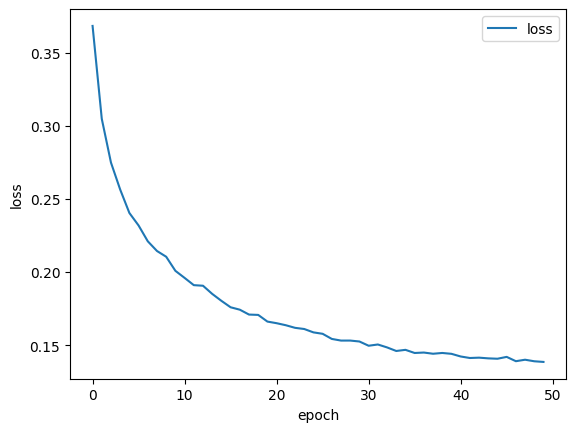

In [14]:
plot_history(loss_history, 'loss')

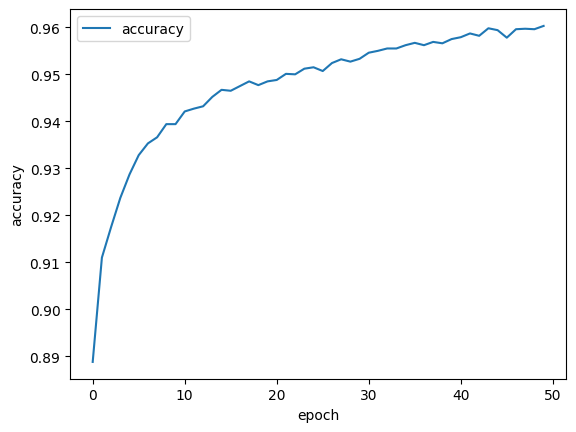

In [15]:
plot_history(accuracy_history, 'accuracy')

In [16]:
def hand_written_recognition(params, x_test, y_test, __range):
    for i in range(__range):
        image = x_test[i].reshape(28, 28)
        yhat, _ = forward(params, x_test[i].reshape(1, -1))
        predicted_label = np.argmax(yhat)
        real_label = np.argmax(y_test[i])
        
        plt.imshow(image, cmap='gray')
        plt.title(f"predicted: {predicted_label}, real: {real_label}")
        plt.show()

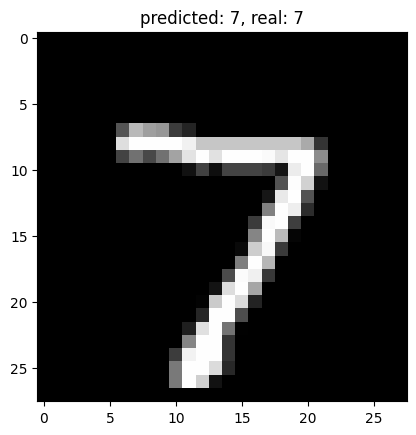

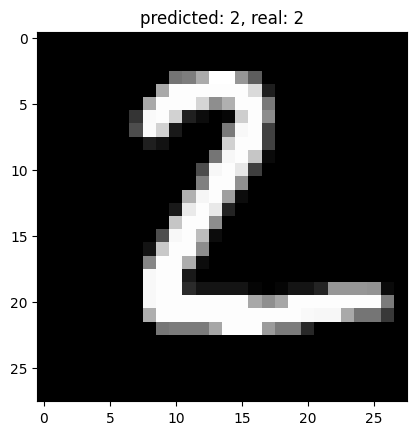

In [17]:
hand_written_recognition(params, x_test, y_test, 2)

In [19]:
import pandas as pd

In [20]:
mnist = pd.read_csv('./mnist.csv')
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
mnist.shape

(10000, 785)

In [22]:
mnist.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
mnist.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64